In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [2]:
"""The purpose of this project is to create an image classification model that can recognize lowercase cursive letters from images drawn by 
different students. Each student submitted images of letters from ‘a’ to ‘z’. The goal is to train a system that can accurately identify 
which letter appears in any given cursive image. This work allows us to examine handwriting recognition in a practical context, where
natural differences in individual handwriting are captured. In the future, we can expand the model for educational technology uses, like 
grading handwritten assignments or developing assistive handwriting software."""

'The purpose of this project is to create an image classification model that can recognize lowercase cursive letters from images drawn by \ndifferent students. Each student submitted images of letters from ‘a’ to ‘z’. The goal is to train a system that can accurately identify \nwhich letter appears in any given cursive image. This work allows us to examine handwriting recognition in a practical context, where\nnatural differences in individual handwriting are captured. In the future, we can expand the model for educational technology uses, like \ngrading handwritten assignments or developing assistive handwriting software.'

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [ ]:
import os
from PIL import Image
import pillow_heif

base_path = "/home/jupyter-1000790/Project_5 - Letter Predictor/cursive_letters"
skip_folders = {"S4", "S7", "S8", "S10", "S11", "S12", "S13", "S16", "S19", "S20", "S21"}

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    if folder_name in skip_folders:
        print(f"Skipping {folder_name}")
        continue

    print(f"Processing folder: {folder_name}")

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".heic"):
            heic_path = os.path.join(folder_path, filename)
            jpg_path = os.path.splitext(heic_path)[0] + ".jpg"

            try:
                heif_file = pillow_heif.read_heif(heic_path)
                image = Image.frombytes(
                    heif_file.mode,
                    heif_file.size,
                    heif_file.data
                )

                if image.mode in ("RGBA", "LA"):
                    background = Image.new("RGB", image.size, (255, 255, 255))
                    background.paste(image, mask=image.split()[-1])
                    image = background
                else:
                    image = image.convert("RGB")

                image.save(jpg_path, format="JPEG", quality=95)
                print(f"Converted: {filename} → {os.path.basename(jpg_path)}")

                os.remove(heic_path)
                print(f"Deleted original HEIC: {filename}")

            except Exception as e:
                print(f"Error converting {filename} in {folder_name}: {e}")

print("All conversions complete for selected folders.")


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

/tmp/ipykernel_988070/4081974642.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


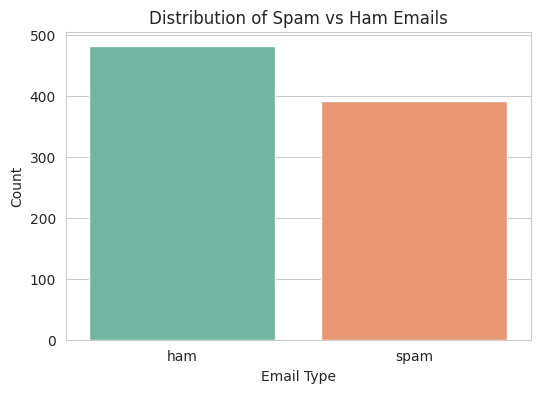

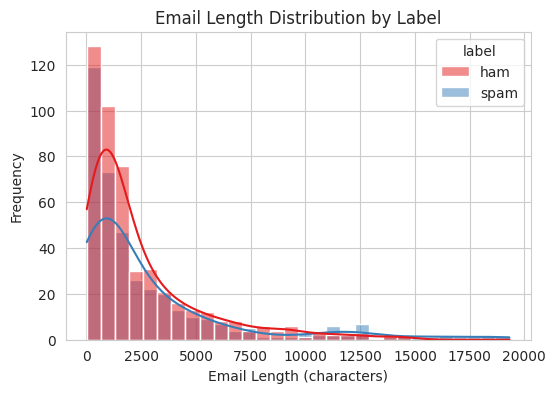

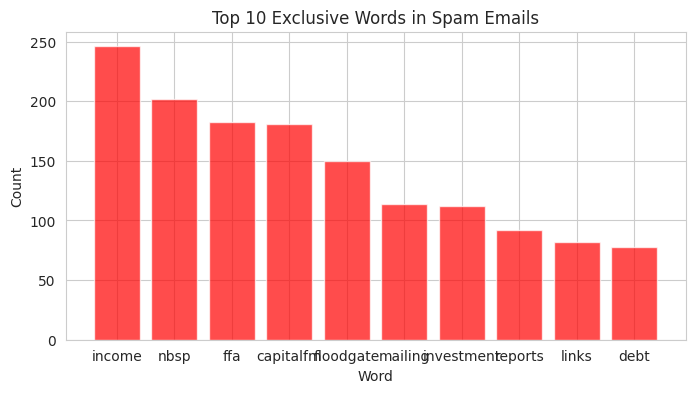

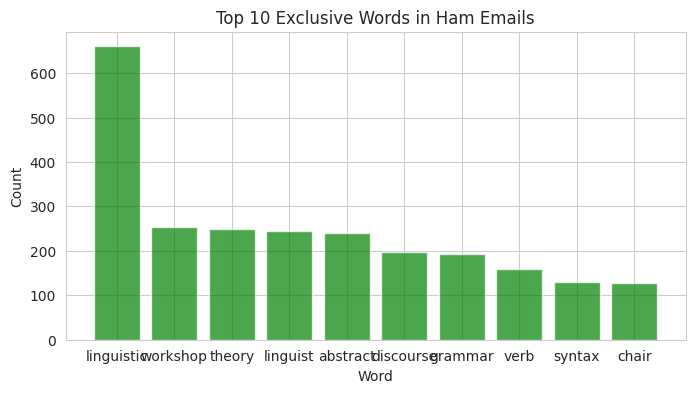

"It appears that the dataset has around a 100 more ham emails than spam. Additionally, it's a trend that the shorter the email is, the\nmore likely it is to be ham, whereas the longer the email is, the more likely it becomes that it is spam. Lastly, the most common words used\nexclusive to spam and ham were extracted, in order to pinpoint which types of emails possess which types of words."

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

sns.set_style("whitegrid")

# Plotting spam vs ham count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Distribution of Spam vs Ham Emails")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

# Calculate the length of each email
df['length'] = df['body'].apply(len)

# Plotting the lengths of the spam and ham emails.
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='length', hue='label', bins=30, kde=True, palette='Set1')
plt.title("Email Length Distribution by Label")
plt.xlabel("Email Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Function to extract common words from both types of emails exclusive to those types.
def get_exclusive_top_words(spam_texts, ham_texts, n=10):
    spam_words = []
    ham_words = []

    # Collect words from both spam and ham.
    for t in spam_texts:
        spam_words.extend(re.findall(r'\b[a-zA-Z]{3,}\b', t.lower()))
    for t in ham_texts:
        ham_words.extend(re.findall(r'\b[a-zA-Z]{3,}\b', t.lower()))

    spam_counter = Counter(spam_words)
    ham_counter = Counter(ham_words)

    # Removing common words that appear in both spam and ham.
    common_words = set(spam_counter.keys()) & set(ham_counter.keys())
    for w in common_words:
        spam_counter.pop(w, None)
        ham_counter.pop(w, None)

    return spam_counter.most_common(n), ham_counter.most_common(n)

# Obtaining the top exclusive words.
spam_top_excl, ham_top_excl = get_exclusive_top_words(
    df[df['label']=='spam']['body'],
    df[df['label']=='ham']['body']
)

# Plotting the words in the form of a relative frequency bar chart. (spam)
plt.figure(figsize=(8,4))
plt.bar([w for w, _ in spam_top_excl], [c for _, c in spam_top_excl], color='red', alpha=0.7)
plt.title("Top 10 Exclusive Words in Spam Emails")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

# Plotting the words in the form of a relative frequency bar chart. (ham)
plt.figure(figsize=(8,4))
plt.bar([w for w, _ in ham_top_excl], [c for _, c in ham_top_excl], color='green', alpha=0.7)
plt.title("Top 10 Exclusive Words in Ham Emails")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()


"""It appears that the dataset has around a 100 more ham emails than spam. Additionally, it's a trend that the shorter the email is, the
more likely it is to be ham, whereas the longer the email is, the more likely it becomes that it is spam. Lastly, the most common words used
exclusive to spam and ham were extracted, in order to pinpoint which types of emails possess which types of words."""

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Filling in the empty spaces so there aren't errors.
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# Setting ham as 0 and spam as 1.
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

x = df['text']
y = df['label_encoded']

# Here I'm splitting the data for training and testing.
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Vectorizing the data here
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_v = vectorizer.fit_transform(x_train)
x_test_v = vectorizer.transform(x_test)


"""I filled in the empty spaces within the table that I created with pandas. Additionally, I used one-hot encoding label encoders to denote 
spam and ham emails. Additionally, I prepared the data for testing and splitting before finally vectorizing the data for the purpose of more
simple algorithm processing."""

'I filled in the empty spaces within the table that I created with pandas. Additionally, I used one-hot encoding label encoders to denote \nspam and ham emails. Additionally, I prepared the data for testing and splitting before finally vectorizing the data for the purpose of more\nsimple algorithm processing.'

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import os

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)#V1.0 RF Classifier
rf_model.fit(x_train_v, y_train)
y_pred_rf = rf_model.predict(x_test_v)

print("\nVersion 1.0 — RF Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


logistic_model = LogisticRegression(max_iter=1000) #V1.1 Logistic
logistic_model.fit(x_train_v, y_train)
y_pred_lr = logistic_model.predict(x_test_v)

print("Version 1.1 — Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))




mnb_model = MultinomialNB() #V1.2 Multinomial NB
mnb_model.fit(x_train_tfidf, y_train)
y_pred_nb = mnb_model.predict(x_test_tfidf)

print("\nVersion 1.2 — Multinomial Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



"""After testing all three models, a few key trends emerged. Although Random Forest performed well, it still required more computational 
resources and tended to overfit the data. Logistic Regression performed decently but didn't capture complex, nonlinear relationships between 
the different words in the two types of emails, leading to a worse accuracy than one of the other models, and a poor recall for spam emails. 
Multinomial Naive Bayes delivered the strongest performance overall, achieving high accuracy and recall since it works very well with TF-IDF 
vectorization, and word-based sorters in general. Therefore, Naive Bayes was the most balanced model for email classification."""


Version 1.0 — RF Classifier Results:
Accuracy: 0.96
              precision    recall  f1-score   support

         ham       0.96      0.97      0.96        95
        spam       0.96      0.95      0.96        80

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175

Version 1.1 — Logistic Regression Results:
Accuracy: 0.9657142857142857
              precision    recall  f1-score   support

         ham       0.95      0.99      0.97        95
        spam       0.99      0.94      0.96        80

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.97       175
weighted avg       0.97      0.97      0.97       175



NameError: name 'x_train_tfidf' is not defined

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': [0.01, 0.1, 0.5, 1, 2, 5]} #Defining the parameter grid for the Multinomial NB
grid = GridSearchCV(MultinomialNB(), params, cv=5) #Creating the grid
grid.fit(x_train_v, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

"""After hypertuning the alpha value to a few different values, I found that the alpha value of 1, produced the greatest score for the model,
reaching an accuracy of ~99.3% still using Multinomial NB"""

Best alpha: {'alpha': 1}
Best score: 0.9928263103802673


'After hypertuning the alpha value to a few different values, I found that the alpha value of 1, produced the greatest score for the model,\nreaching an accuracy of ~99.3% still using Multinomial NB'

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


In [17]:
"""This project ultimately focused on developing a model that could classify emails as either spam, or legitimate in an effort to
automatically filter out unwanted messages for the customer. The dataset utilized for the development of the model contained of emails which 
had labels indicating whether they were spam or legitimate. Both the subject and body of the email were merged together for an analysis of the
text within the email. After exploring the data, it was found that the sapm emails tended to be longer, and used financial words, such as 
"income," "capital," "investment," and "debt," while the legitimate emails had more formal terms typically seen in an email. After 
preprocessing and vectorizing the data using a TF-IDF vectorizer, I tested three differnet models to see which one achieved the best accuracy.
Among them, being Random Forest (96), Logsitic Regression (96.6), and Multinomial Naive Bayes (NB) (98.9), Multinomial NB performed the best,
because it is best suited for TF-IDF vectorized data, and just word classifiers in general. By fine-tuning the parameters, I further increased
the accuracy, through changing one of the alpha values to 1, reaching a final accuracy of 99.3%. I found these values to be somewhat high for
a model, but I rechecked my methodology, and found that there was no data leakage, and that I had a 20% split with my data for training and 
testing. Overall, the final model had a very strong accuracy in identifying whether an example email was spam or legitimate, and would prove
useful in filtering somebody's inbox for unnecessary clutter."""


'This project ultimately focused on developing a model that could classify emails as either spam, or legitimate in an effort to\nautomatically filter out unwanted messages for the customer. The dataset utilized for the development of the model contained of emails which \nhad labels indicating whether they were spam or legitimate. Both the subject and body of the email were merged together for an analysis of the\ntext within the email. After exploring the data, it was found that the sapm emails tended to be longer, and used financial words, such as \n"income," "capital," "investment," and "debt," while the legitimate emails had more formal terms typically seen in an email. After \npreprocessing and vectorizing the data using a TF-IDF vectorizer, I tested three differnet models to see which one achieved the best accuracy.\nAmong them, being Random Forest (96), Logsitic Regression (96.6), and Multinomial Naive Bayes (NB) (98.9), Multinomial NB performed the best,\nbecause it is best suite

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [1]:
def inference(subject: str, body: str):
    import pickle
    import pandas as pd

    # Here, I'm just loading my model and the vectorizer for the inference function.
    with open("/home/jupyter-1000790/Project_4/model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
    with open("/home/jupyter-1000790/Project_4/vectorizer.pkl", "rb") as vec_file:
        vectorizer = pickle.load(vec_file)

    #Here, I'm just combining the email content, and vectorizing it like I did in the original model.
    email_text = subject + " " + body
    email_features = vectorizer.transform([email_text])

    # Here, I'm making the prediction for the model, so it can be printed below.
    prediction = model.predict(email_features)[0]
    probability = model.predict_proba(email_features)[0]

    return {
        "predicted_label": prediction,
        "probabilities": {
            "ham": float(probability[0]),
            "spam": float(probability[1])
        }
    }

print(inference(subject="Chinese Test", body="Hi Mr. Ortiz, please come during 4th period to make up your Chinese test. "))
print(inference(subject="Congratulations, you've won a prize!", body="Click on this link to accept your free $100 amazon gift card!"))

{'predicted_label': 'ham', 'probabilities': {'ham': 0.6240604697556896, 'spam': 0.3759395302443117}}
{'predicted_label': 'spam', 'probabilities': {'ham': 0.06670838488116014, 'spam': 0.933291615118839}}
